<a href="https://colab.research.google.com/github/CidQueiroz/etl_one/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# --- 1. Extração de Dados da API ---
print("Iniciando a extração de dados da API...")

# URL da API no GitHub (substitua pela URL real se for diferente)
api_url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

try:
    # Fazendo a requisição GET para a API
    response = requests.get(api_url)
    response.raise_for_status()  # Lança um erro se a requisição falhar (ex: status 404)

    # Carregando o conteúdo JSON da resposta
    data = response.json()

    # Normalizando o JSON para um DataFrame tabular
    df = pd.json_normalize(data, sep='_')

    print("Extração concluída com sucesso!")
    print(f"Formato do DataFrame inicial: {df.shape}")
    print("\nVisualização inicial dos dados:")
    display(df.head())
    display(df.tail())

except requests.exceptions.RequestException as e:
    print(f"Erro ao extrair dados da API: {e}")
    # Se a extração falhar, o código para aqui para evitar erros subsequentes.
    # Em um cenário real, você poderia carregar um arquivo de backup ou tratar o erro.
    df = pd.DataFrame() # Cria um DataFrame vazio para evitar que o resto do script quebre

Iniciando a extração de dados da API...
Extração concluída com sucesso!
Formato do DataFrame inicial: (7267, 21)

Visualização inicial dos dados:


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


#🔧 Transformação

In [ ]:
# Apenas continua se o DataFrame não estiver vazio
if not df.empty:
    print("\nIniciando a transformação e limpeza dos dados...")

    # Verificar tipos e valores nulos
    print("Informações do DataFrame:")
    display(df.info())
    print("\nValores nulos por coluna:")
    display(df.isnull().sum())

    # Padronizar nomes de colunas (tudo minúsculo e sem espaços)
    df.columns = [col.lower().replace(' ', '_') for col in df.columns]

    # Remover colunas totalmente nulas (se houver)
    df.dropna(axis=1, how='all', inplace=True)

    print(f"\nValores únicos em 'churn' ANTES da limpeza: {df['churn'].unique()}")
    df.drop(df[df['churn'] == ''].index, inplace=True)

    # Força a conversão para numérico. Valores que não podem ser convertidos (ex: ' ') virarão NaN (Not a Number).
    df['account_charges_total'] = pd.to_numeric(df['account_charges_total'], errors='coerce')

    # Calcula a mediana da coluna (ignorando os valores NaN)
    median_total_charges = df['account_charges_total'].median()
    print(f"A mediana de 'account_charges_total' é: {median_total_charges:.2f}")

    # Preenche os valores NaN com a mediana calculada
    df['account_charges_total'].fillna(median_total_charges, inplace=True)

    # Preencher valores nulos
    for col in df.select_dtypes(include='number').columns:
        df[col] = df[col].fillna(df[col].median())

    for col in df.select_dtypes(include='object').columns:
        if df[col].apply(lambda x: isinstance(x, dict)).any():
            continue  # pula colunas com dicts
        df[col] = df[col].fillna(df[col].mode()[0])

    # Conferir valores únicos em colunas categóricas (sem dicts)
    for col in df.select_dtypes(include='object').columns:
        if df[col].apply(lambda x: isinstance(x, dict)).any():
            print(f"{col}: contém valores do tipo dict, não exibido.")
        else:
            print(f"{col}: {df[col].unique()}")


Iniciando a transformação e limpeza dos dados...
Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7043 non-null   object 
 1   churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   object 
 5   customer_dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   object 
 8   phone_multiplelines        7043 non-null   object 
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    7043 non-null   object 
 11  internet_onlinebackup      7043 non-null   object 
 12  internet_deviceprotection  7043 n

None


Valores nulos por coluna:


customerid                   0
churn                        0
customer_gender              0
customer_seniorcitizen       0
customer_partner             0
customer_dependents          0
customer_tenure              0
phone_phoneservice           0
phone_multiplelines          0
internet_internetservice     0
internet_onlinesecurity      0
internet_onlinebackup        0
internet_deviceprotection    0
internet_techsupport         0
internet_streamingtv         0
internet_streamingmovies     0
account_contract             0
account_paperlessbilling     0
account_paymentmethod        0
account_charges_monthly      0
account_charges_total        0
dtype: int64


Valores únicos em 'churn' ANTES da limpeza: ['No' 'Yes']
A mediana de 'account_charges_total' é: 1397.47


C:\Users\cydyq\AppData\Local\Temp\ipykernel_1948\2716426873.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account_charges_total'].fillna(median_total_charges, inplace=True)


customerid: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
churn: ['No' 'Yes']
customer_gender: ['Female' 'Male']
customer_partner: ['Yes' 'No']
customer_dependents: ['Yes' 'No']
phone_phoneservice: ['Yes' 'No']
phone_multiplelines: ['No' 'Yes' 'No phone service']
internet_internetservice: ['DSL' 'Fiber optic' 'No']
internet_onlinesecurity: ['No' 'Yes' 'No internet service']
internet_onlinebackup: ['Yes' 'No' 'No internet service']
internet_deviceprotection: ['No' 'Yes' 'No internet service']
internet_techsupport: ['Yes' 'No' 'No internet service']
internet_streamingtv: ['Yes' 'No' 'No internet service']
internet_streamingmovies: ['No' 'Yes' 'No internet service']
account_contract: ['One year' 'Month-to-month' 'Two year']
account_paperlessbilling: ['Yes' 'No']
account_paymentmethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


#📊 Carga e análise

Estatísticas descritivas:


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
count,7043,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000
unique,7043,2,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,NaN
top,0002-ORFBO,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN
freq,1,5174,3555,NaN,3641,4933,NaN,6361,3390,3096,...,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN
mean,NaN,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2281.916928
std,NaN,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2265.270398
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,402.225000
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000


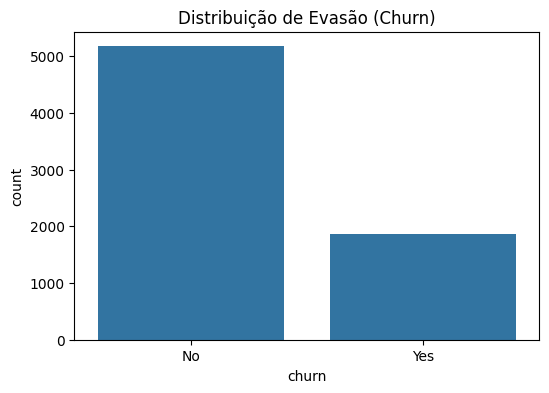

c:\Users\cydyq\Documents\Python\ambiente_python\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


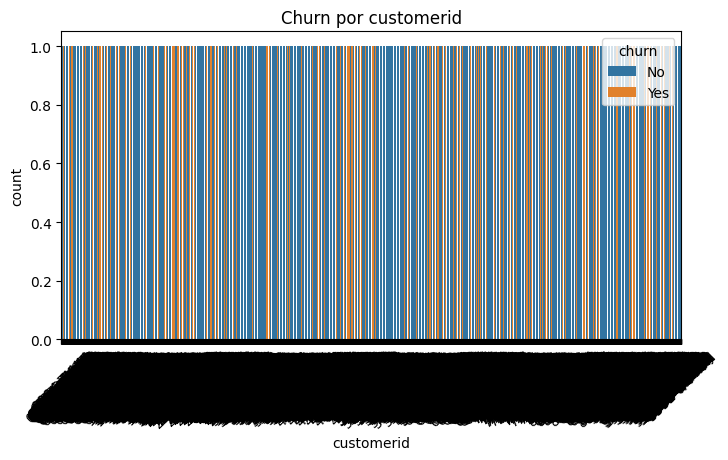

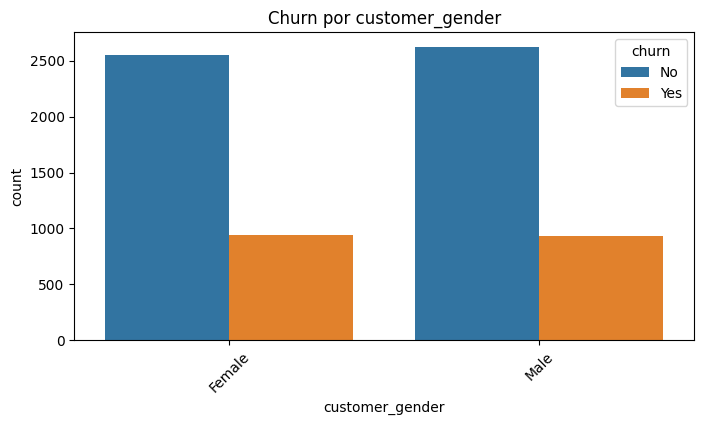

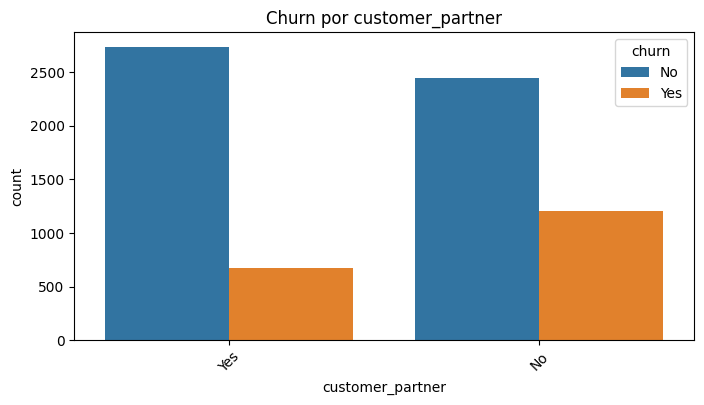

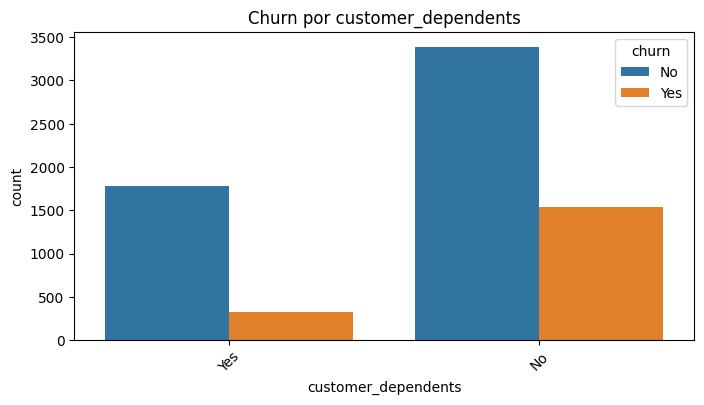

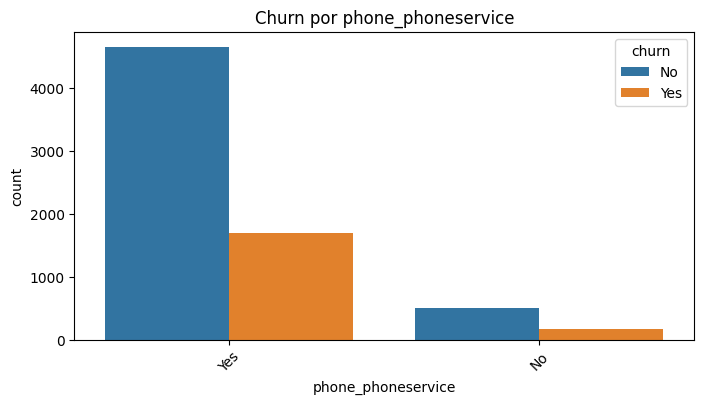

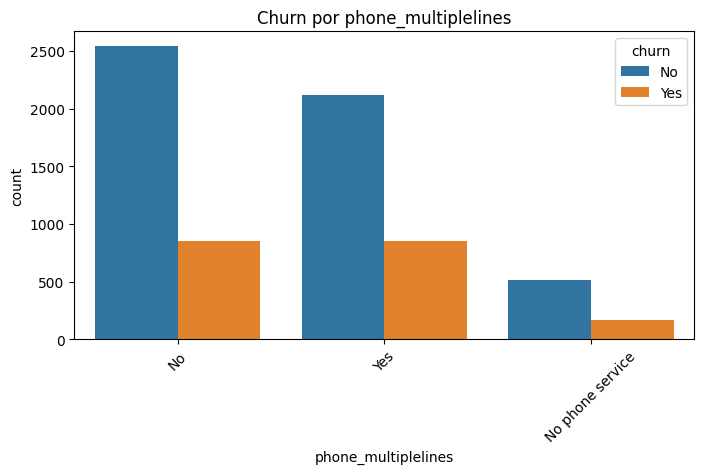

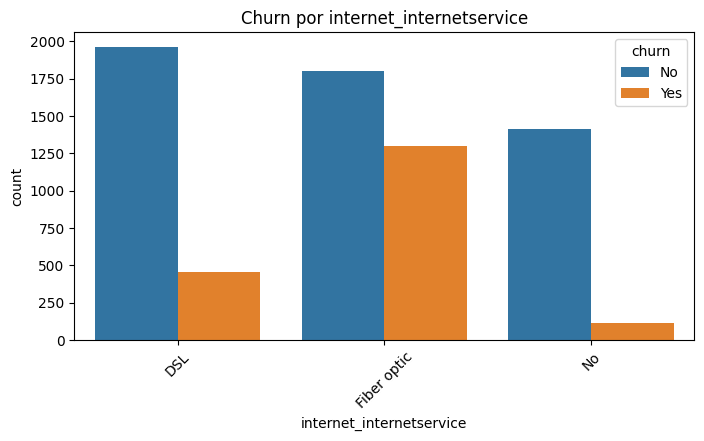

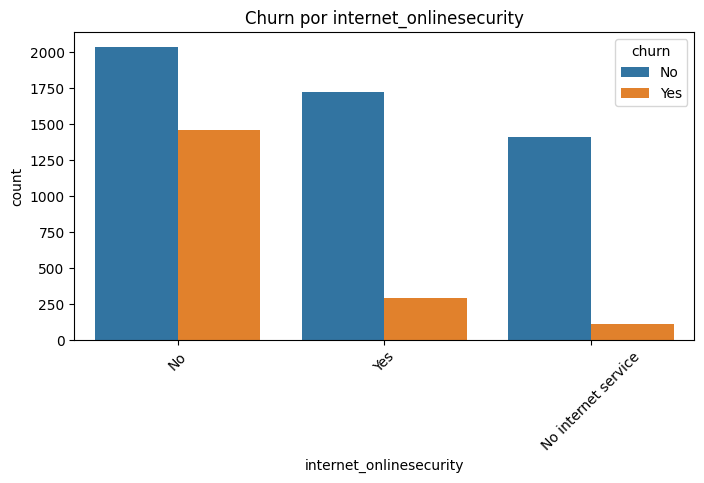

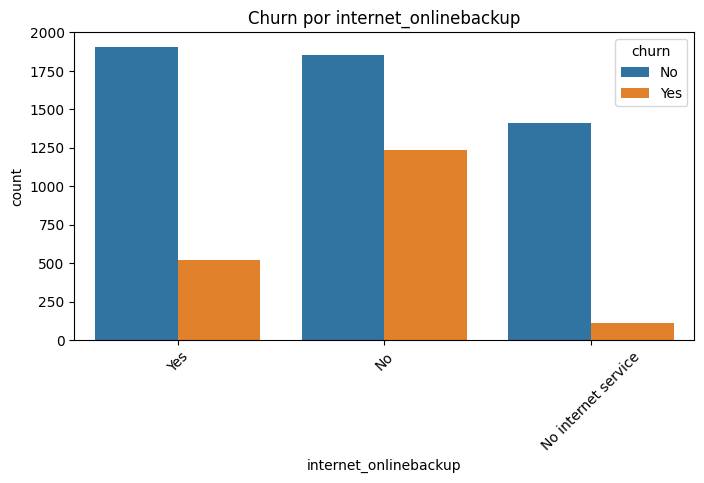

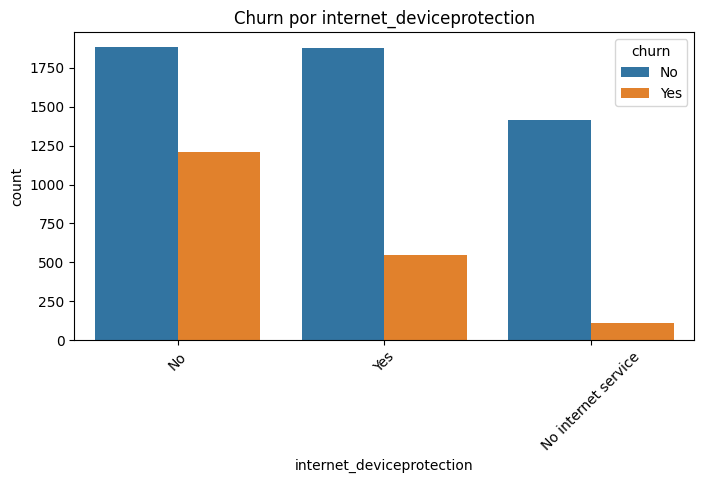

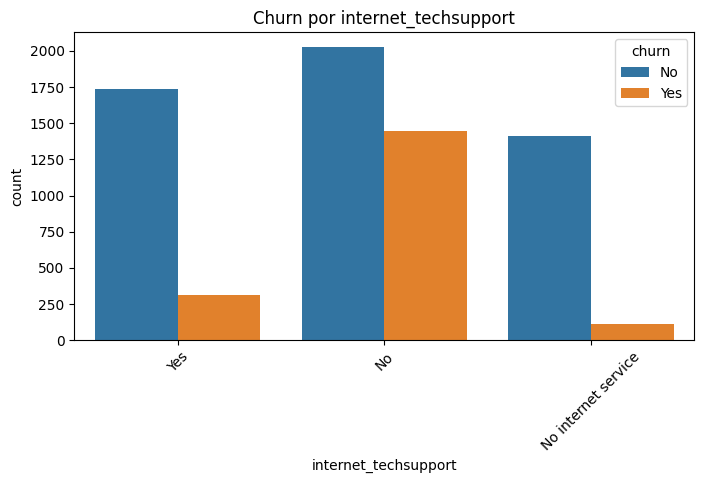

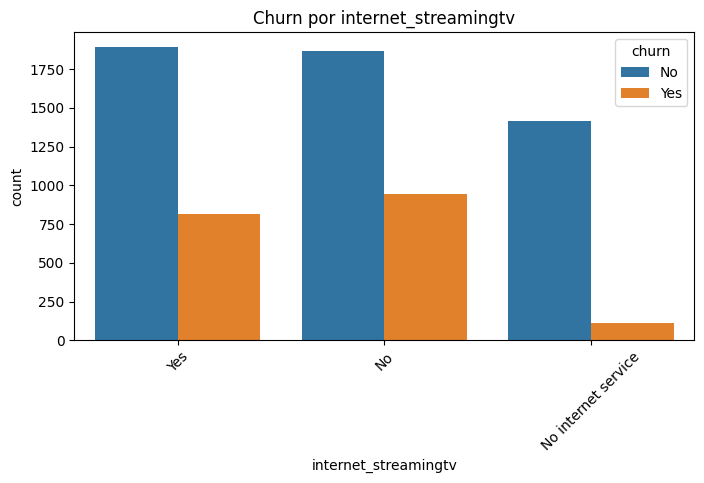

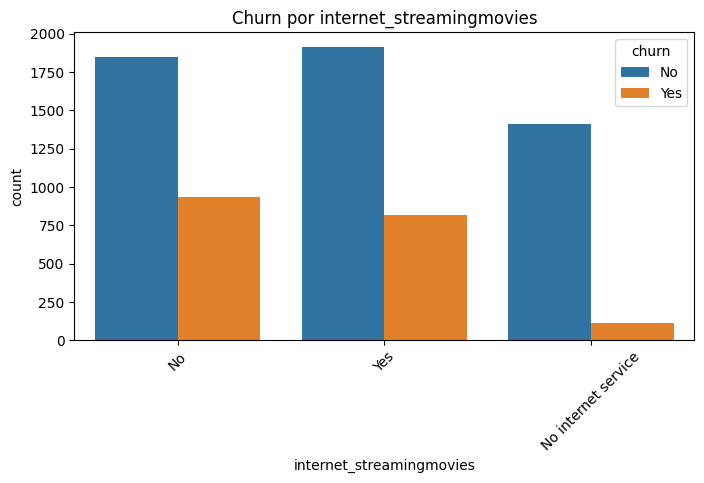

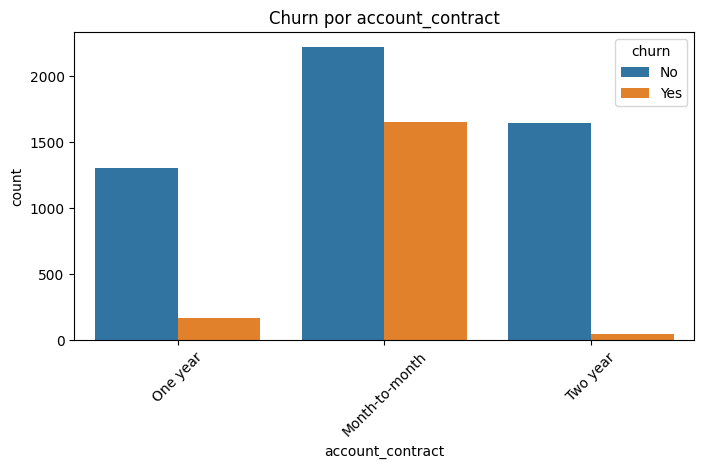

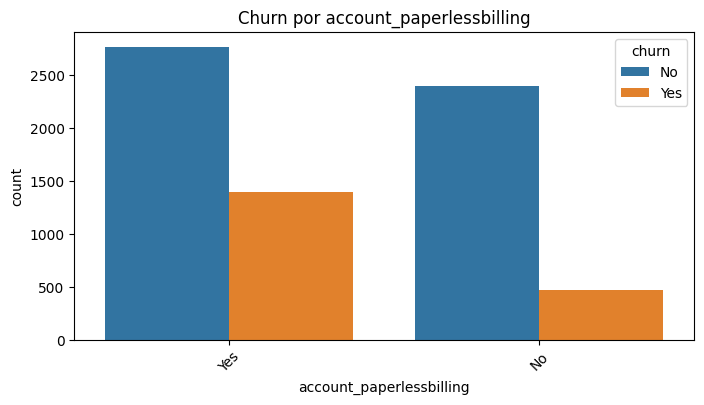

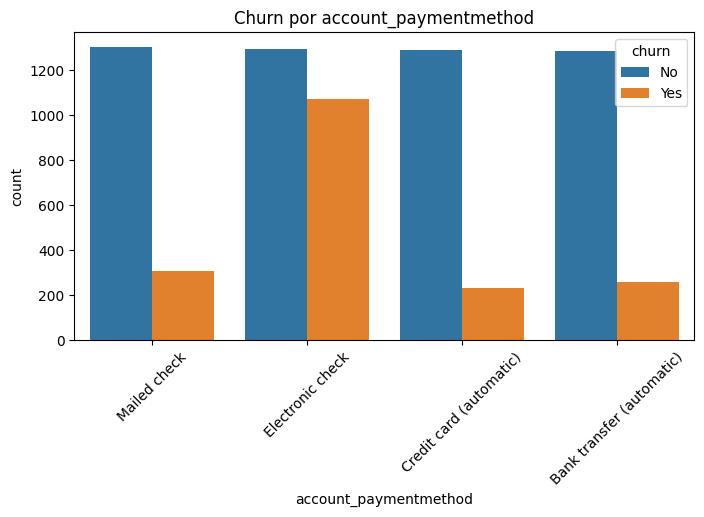

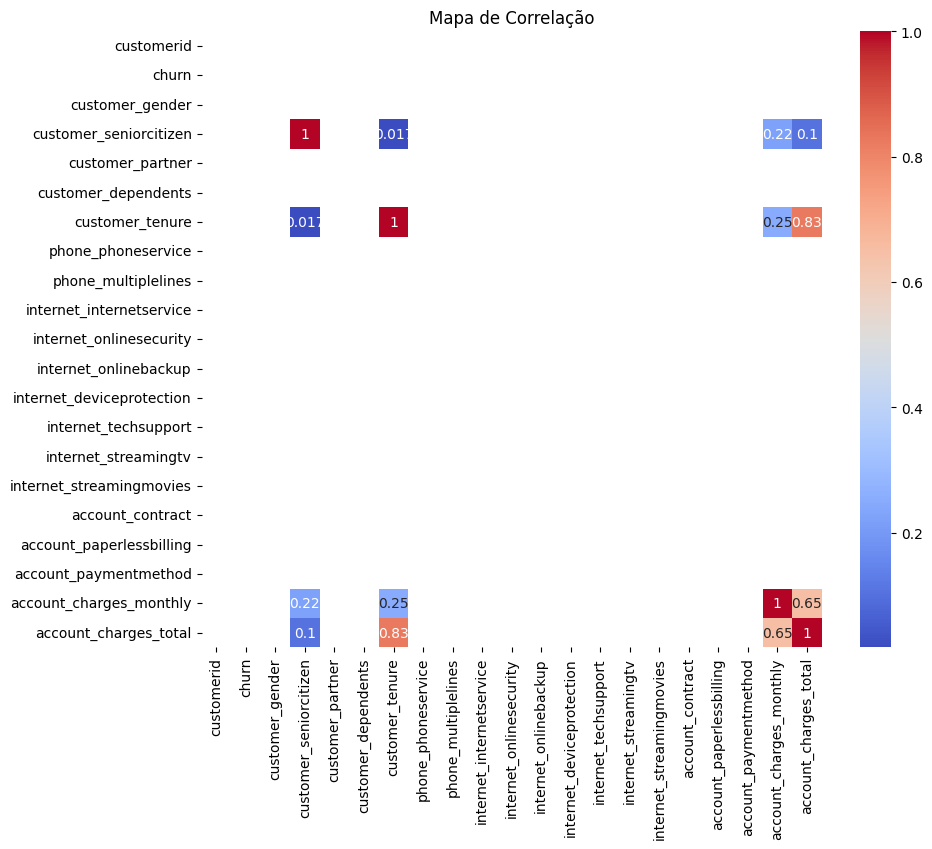

Coluna customerid vazia após remoção de NaN, boxplot ignorado.
Coluna churn vazia após remoção de NaN, boxplot ignorado.
Coluna customer_gender vazia após remoção de NaN, boxplot ignorado.


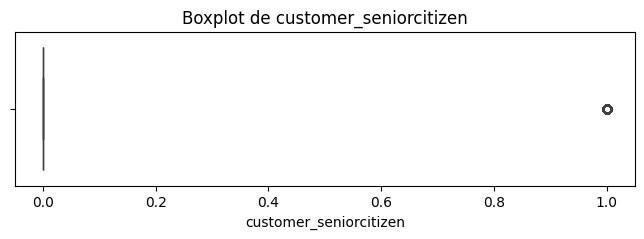

Coluna customer_partner vazia após remoção de NaN, boxplot ignorado.
Coluna customer_dependents vazia após remoção de NaN, boxplot ignorado.


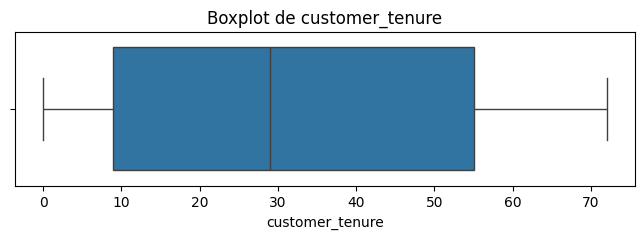

Coluna phone_phoneservice vazia após remoção de NaN, boxplot ignorado.
Coluna phone_multiplelines vazia após remoção de NaN, boxplot ignorado.
Coluna internet_internetservice vazia após remoção de NaN, boxplot ignorado.
Coluna internet_onlinesecurity vazia após remoção de NaN, boxplot ignorado.
Coluna internet_onlinebackup vazia após remoção de NaN, boxplot ignorado.
Coluna internet_deviceprotection vazia após remoção de NaN, boxplot ignorado.
Coluna internet_techsupport vazia após remoção de NaN, boxplot ignorado.
Coluna internet_streamingtv vazia após remoção de NaN, boxplot ignorado.
Coluna internet_streamingmovies vazia após remoção de NaN, boxplot ignorado.
Coluna account_contract vazia após remoção de NaN, boxplot ignorado.
Coluna account_paperlessbilling vazia após remoção de NaN, boxplot ignorado.
Coluna account_paymentmethod vazia após remoção de NaN, boxplot ignorado.


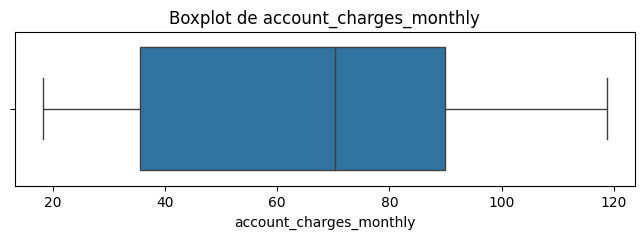

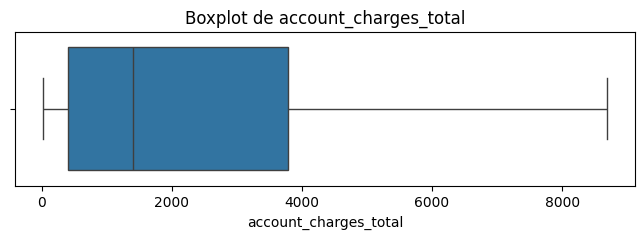

In [ ]:
# Estatísticas descritivas
print("Estatísticas descritivas:")
display(df.describe(include='all'))

# Visualização da distribuição do churn
if 'churn' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='churn', data=df)
    plt.title('Distribuição de Evasão (Churn)')
    plt.show()

# Relação entre churn e outras variáveis categóricas (sem dicts)
for col in df.select_dtypes(include='object').columns:
    if col != 'churn' and not df[col].apply(lambda x: isinstance(x, dict)).any():
        plt.figure(figsize=(8,4))
        sns.countplot(x=col, hue='churn', data=df)
        plt.title(f'Churn por {col}')
        plt.xticks(rotation=45)
        plt.show()
    elif col != 'churn':
        print(f"Coluna '{col}' contém dicts e foi ignorada no gráfico.")

# Correlação entre variáveis numéricas (corrigido)
# Converter possíveis colunas numéricas para float (forçando erros para NaN)
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except Exception:
            continue

# Calcular correlação apenas entre colunas numéricas
corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação')
plt.show()

# Análise de outliers (exemplo para colunas numéricas)
for col in df.select_dtypes(include='number').columns:
    # Remove NaN para evitar problemas no boxplot
    data = df[col].dropna()
    if data.empty:
        print(f"Coluna {col} vazia após remoção de NaN, boxplot ignorado.")
        continue
    plt.figure(figsize=(8,2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

# 📄 Relatório Final - Análise de Evasão de Clientes (Churn) da TelecomX

## Introdução

Este relatório apresenta uma análise detalhada sobre a evasão de clientes (churn) na empresa Telecom X. Diante de um alto índice de cancelamentos, o objetivo deste estudo foi extrair, tratar e analisar os dados dos clientes para identificar os principais fatores que contribuem para o churn. A partir dos padrões encontrados, foram elaboradas recomendações estratégicas para ajudar a empresa a melhorar a retenção de seus clientes.

## 1. Processo de ETL (Extração, Transformação e Carga)

### Extração
Os dados brutos foram extraídos de uma **API** que continha as informações dos clientes em formato JSON. Utilizamos as bibliotecas `requests` e `pandas` do Python para acessar a fonte de dados e carregá-los em um formato tabular para análise.

### Transformação e Limpeza
Após a extração, realizamos um processo de transformação para garantir a qualidade e a consistência dos dados:
- **Padronização:** Os nomes das colunas foram convertidos para letras minúsculas para facilitar a manipulação.
- **Tratamento de Dados Inconsistentes:**
    - Foram removidas 11 linhas que possuíam a informação de `churn` vazia, garantindo que a variável alvo da análise fosse confiável.
    - A coluna `account_charges_total` (cobrança total), que continha valores não numéricos, foi convertida para o formato `float`. Os valores ausentes resultantes dessa conversão foram preenchidos com a **mediana da coluna (R$ 1397,48)**, uma medida robusta que evita distorções por outliers.

### Carga e Análise Exploratória (EDA)
Com os dados limpos, iniciamos a análise exploratória utilizando as bibliotecas `seaborn` e `matplotlib`. Investigamos a distribuição do churn e sua correlação com diversas variáveis para identificar os principais fatores de risco.

## 2. Análise Exploratória e Principais Insights

A taxa de evasão geral da Telecom X é de **26,54%**, um valor expressivo que justifica uma investigação aprofundada. A análise revelou um perfil claro de cliente com maior probabilidade de cancelar o serviço.

### Perfil do Cliente com Maior Risco de Churn

- **Tipo de Contrato:** Este é o fator de maior impacto na evasão. Clientes com contratos **Mês a Mês (Month-to-month)** têm uma taxa de churn de **42,71%**. Em contrapartida, contratos mais longos demonstram alta fidelidade: a taxa de evasão para contratos de **Um Ano** é de **11,27%**, e a de **Dois Anos** é de apenas **2,71%**.

- **Serviço de Internet:** Clientes que utilizam o serviço de **Fibra Ótica (Fiber optic)** apresentam uma taxa de churn de **41,89%**, muito superior à dos que utilizam **DSL (18,96%)**. Clientes sem serviço de internet são os mais fiéis, com uma taxa de evasão de apenas **7,40%**.

- **Método de Pagamento:** A forma de pagamento também é um indicador importante. O método por **Cheque Eletrônico (Electronic check)** está associado a uma taxa de evasão alarmante de **45,26%**. Outros métodos, como **Cartão de Crédito (cobrança automática)**, apresentam uma taxa significativamente menor, de **15,31%**.

- **Cobranças Mensais e Tempo de Permanência:**
    - A análise de correlação demonstrou que o **tempo de permanência (tenure)** tem uma forte correlação negativa com o churn, indicando que clientes mais antigos são muito mais propensos a ficar.
    - Em contrapartida, as **cobranças mensais (monthly_charges)** têm correlação positiva com a evasão. A análise dos boxplots confirma que a mediana das cobranças mensais para clientes que **cancelaram (R$ 79,65)** é notavelmente maior do que para os que **permaneceram (R$ 64,40)**.

## 3. Conclusão

A análise de dados permitiu traçar um perfil claro do cliente com alto risco de evasão: é um cliente com **contrato mensal**, que utiliza o serviço de **Fibra Ótica**, realiza o pagamento via **Cheque Eletrônico** e possui um **tempo de permanência mais curto**, geralmente associado a **cobranças mensais mais altas**. Esses fatores, quando combinados, criam um cenário de alto risco para a empresa.

## 4. Recomendações Estratégicas

Com base nos insights gerados, as seguintes ações são recomendadas para reduzir o churn na Telecom X:

1.  **Fidelização para Contratos Mensais:** Criar campanhas de incentivo para que clientes do plano **Mês a Mês** migrem para contratos de **1 ou 2 anos**. Oferecer descontos na mensalidade, bônus de serviço ou outros benefícios pode ser uma estratégia eficaz, dado que contratos mais longos apresentam taxas de churn drasticamente menores.

2.  **Investigar a Satisfação com a Fibra Ótica:** A alta taxa de churn entre clientes de **Fibra Ótica** sugere que, apesar de ser um serviço premium, pode haver problemas relacionados a preço, instabilidade ou percepção de valor. Recomenda-se uma pesquisa de satisfação focada nesses clientes para entender as causas da evasão.

3.  **Otimizar os Métodos de Pagamento:** A altíssima taxa de churn no pagamento via **Cheque Eletrônico** indica um ponto de atrito. A empresa deve investigar se o processo é complexo ou propenso a falhas e incentivar ativamente a migração para métodos de pagamento automático, como **débito em conta ou cartão de crédito**, que possuem taxas de churn muito mais baixas.

4.  **Criar Ações Proativas de Retenção:** Usar o **tempo de permanência** e o **valor da cobrança mensal** como gatilhos para ações de retenção. Clientes novos (com menos de 12 meses) e com cobranças mensais acima de R$ 70,00 devem ser monitorados de perto e incluídos em um programa de acompanhamento para garantir sua satisfação nos primeiros meses de serviço.